In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
%%time
data_location = "../projeto-integrador-final/data/Faturamento.csv"
data = pd.read_csv(data_location, sep = ";", low_memory=False)

CPU times: total: 1.47 s
Wall time: 1.46 s


In [97]:
data.head(5)

,ANO,MES,TRIMESTRE,GRUPO,DESCRICAO_GRUPO,FAMILIA,DESCRICAO_FAMILIA,UF,CIDADE,ELEICAO_MUNICIPAL,ELEICAO_FEDERAL,VARIACAO_DOLAR,INFLACAO,PIB,QUANTIDADE,VALOR
0,2014,2,1,C,Produtos Para Saude (Correlatos),124C,Cateteres,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",33,"19,71"
1,2014,2,1,C,Produtos Para Saude (Correlatos),102C,Instrumentais Cirurgicos,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",22,"221,66"
2,2014,5,2,C,Produtos Para Saude (Correlatos),101C,Absorvente,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",1,"9,63"
3,2014,4,2,C,Produtos Para Saude (Correlatos),103C,Agulhas Descartaveis,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",22140,"988,03"
4,2014,4,2,C,Produtos Para Saude (Correlatos),173C,Seringas,SC,RIO DO SUL,0,1,"14,40010277","6,41","0,5",2613,"559,11"


In [98]:
print("Total rows: {0}".format(len(data)))

Total rows: 573118


In [99]:
data.isnull().sum()

ANO                  0
MES                  0
TRIMESTRE            0
GRUPO                0
DESCRICAO_GRUPO      0
FAMILIA              0
DESCRICAO_FAMILIA    0
UF                   0
CIDADE               0
ELEICAO_MUNICIPAL    0
ELEICAO_FEDERAL      0
VARIACAO_DOLAR       0
INFLACAO             0
PIB                  0
QUANTIDADE           0
VALOR                0
dtype: int64

In [100]:
print('\nConjunto de dados, linhas e colunas\n')
print('Shape:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Check nulos: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')



Conjunto de dados, linhas e colunas

Shape: (573118, 16)

---------------------------------------------


Check valores nulos

Check nulos: 

ANO                  0
MES                  0
TRIMESTRE            0
GRUPO                0
DESCRICAO_GRUPO      0
FAMILIA              0
DESCRICAO_FAMILIA    0
UF                   0
CIDADE               0
ELEICAO_MUNICIPAL    0
ELEICAO_FEDERAL      0
VARIACAO_DOLAR       0
INFLACAO             0
PIB                  0
QUANTIDADE           0
VALOR                0
dtype: int64

---------------------------------------------


Estatísticas

                 ANO            MES      TRIMESTRE  ELEICAO_MUNICIPAL  \
count  573118.000000  573118.000000  573118.000000      573118.000000   
mean     2015.891181       6.499826       2.500698           0.233856   
std         3.756827       3.253980       1.075679           0.423282   
min      2008.000000       1.000000       1.000000           0.000000   
25%      2013.000000       4.000000       2.0000

Plotando a correlaçao

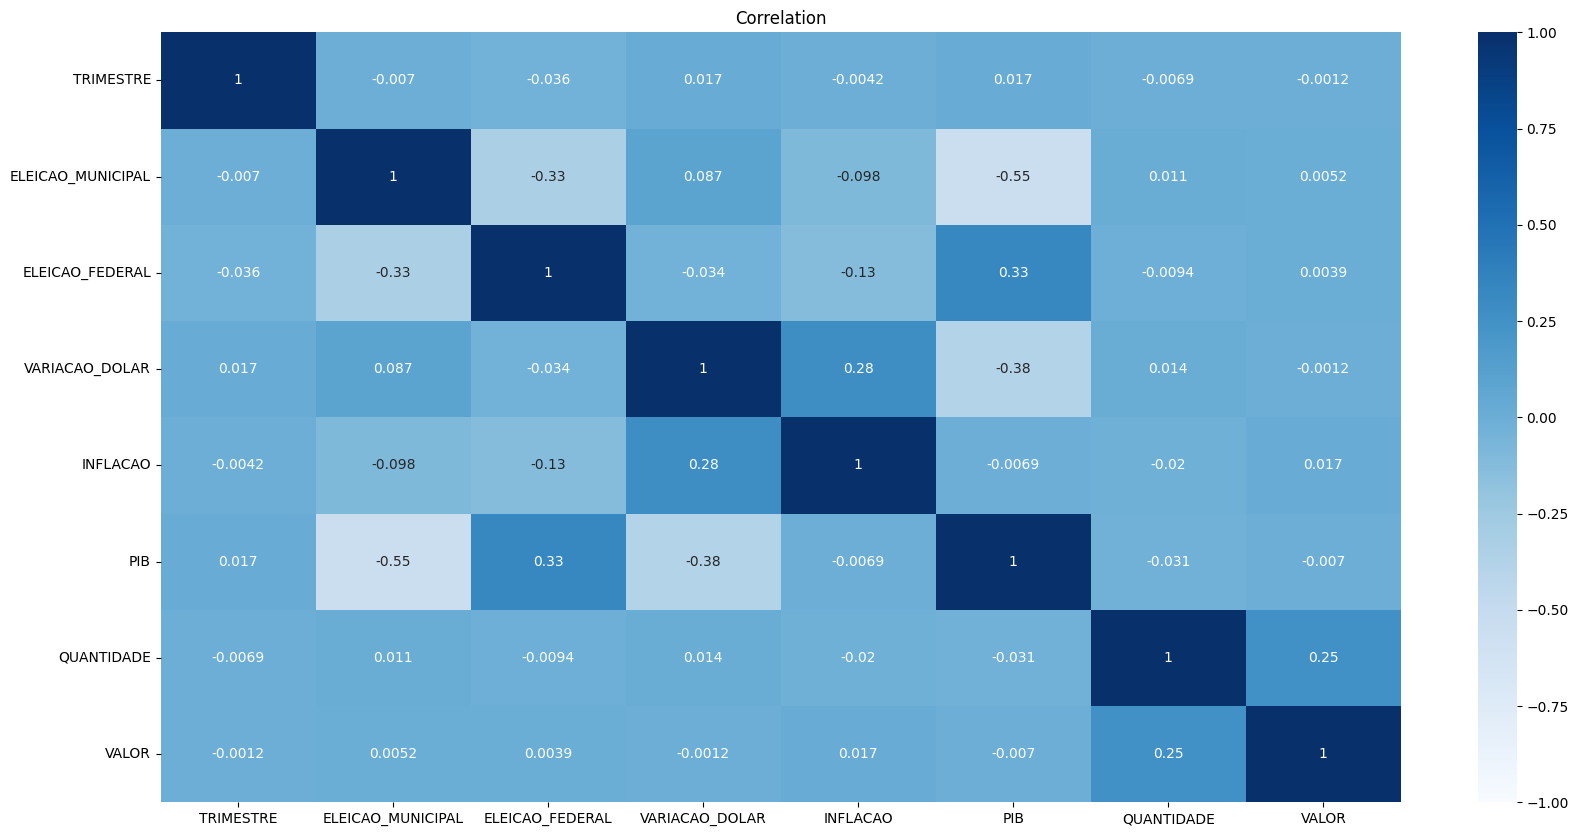

In [120]:
plt.figure(figsize = (20,10))
plt.title('Correlation')
sns.heatmap(data.corr(), 
            annot = True, 
            vmin = -1, 
            cmap = 'Blues'
           );
#plt.savefig("../Correlation1.png", dpi = 600 )

Alteração das colunas VARIACAO_DOLAR, INFLACAO, PIB, QUANTIDADE, VALOR dtype object para float

In [101]:
data['VARIACAO_DOLAR'] =data['VARIACAO_DOLAR'].apply(lambda x: x.replace(',', '.')).astype('float')
data['INFLACAO'] =data['INFLACAO'].apply(lambda x: x.replace(',', '.')).astype('float')
data['PIB'] =data['PIB'].apply(lambda x: x.replace(',', '.')).astype('float')
data['QUANTIDADE'] =data['QUANTIDADE'].apply(lambda x: x.replace(',', '.')).astype('float')
data['VALOR'] =data['VALOR'].apply(lambda x: x.replace(',', '.')).astype('float')

Alteração das colunas ANO e MES para string

In [103]:
data["ANO"] = data["ANO"].astype("str")
data["MES"] = data["MES"].astype("str")

Criação de uma nova coluna DATA concatenando o mês e o ano e convertendo para datetime

In [105]:
s_mes = data.MES
data["MES"] = s_mes.str.zfill(2)
data['DATA']= '01' + data.MES + data.ANO
data['DATA']=pd.to_datetime(data['DATA'], format='%d%m%Y')
data[['ANO','MES','DATA']]

,ANO,MES,DATA
0,2014,02,2014-02-01
1,2014,02,2014-02-01
2,2014,05,2014-05-01
3,2014,04,2014-04-01
4,2014,04,2014-04-01
...,...,...,...
573113,2015,02,2015-02-01
573114,2015,02,2015-02-01
573115,2022,01,2022-01-01
573116,2016,12,2016-12-01


Criando mascara para definir se é ano eleitoral ou não

In [108]:
mask_el_fed = data.ELEICAO_FEDERAL == 1
dt_el_fed = data.loc[mask_el_fed, ['ANO']]

mask_el_mun = data.ELEICAO_MUNICIPAL == 1
dt_el_mun = data.loc[mask_el_mun, ['ANO']]

print('Anos eleitorais:', dt_el_fed.ANO.unique(), dt_el_mun.ANO.unique() )

Anos eleitorais: ['2014' '2010' '2018' '2022'] ['2016' '2020' '2012' '2008']


In [ ]:
Criando de um dicionario e nova coluna classificando se é ano eleitoral ou não

In [111]:
ano_eleitoral = { "2008": 1,
                 "2009": 0,
                 "2010": 1,
                 "2011": 0,
                 "2012": 1,
                 "2013": 0,
                 "2014": 1,
                 "2015": 0,
                 "2016": 1,
                 "2017": 0,
                 "2018": 1,
                 "2019": 0,
                 "2020": 1,
                 "2021": 0,
                 "2022": 1
         }

data["ANO_ELEITORAL"] = data.ANO.map(ano_eleitoral)
data["ANO_ELEITORAL"] = data["ANO_ELEITORAL"].astype("category")

Verificando a nova coluna ANO_ELEITORAL

In [113]:
data[['ANO','ELEICAO_FEDERAL', 'ELEICAO_MUNICIPAL', 'ANO_ELEITORAL']]

,ANO,ELEICAO_FEDERAL,ELEICAO_MUNICIPAL,ANO_ELEITORAL
0,2014,1,0,1
1,2014,1,0,1
2,2014,1,0,1
3,2014,1,0,1
4,2014,1,0,1
...,...,...,...,...
573113,2015,0,0,0
573114,2015,0,0,0
573115,2022,1,0,1
573116,2016,0,1,1


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573118 entries, 0 to 573117
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                573118 non-null  object        
 1   MES                573118 non-null  object        
 2   TRIMESTRE          573118 non-null  int64         
 3   GRUPO              573118 non-null  object        
 4   DESCRICAO_GRUPO    573118 non-null  object        
 5   FAMILIA            573118 non-null  object        
 6   DESCRICAO_FAMILIA  573118 non-null  object        
 7   UF                 573118 non-null  object        
 8   CIDADE             573118 non-null  object        
 9   ELEICAO_MUNICIPAL  573118 non-null  int64         
 10  ELEICAO_FEDERAL    573118 non-null  int64         
 11  VARIACAO_DOLAR     573118 non-null  float64       
 12  INFLACAO           573118 non-null  float64       
 13  PIB                573118 non-null  float64 

Criação de novo dataframe dt_vendas removendo colunas que não serão utilizadas

In [126]:
dt_vendas = data.drop(columns=['ANO', 'MES', 'TRIMESTRE','FAMILIA','DESCRICAO_FAMILIA','ELEICAO_FEDERAL', 'ELEICAO_MUNICIPAL'])
dt_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573118 entries, 0 to 573117
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   GRUPO            573118 non-null  object        
 1   DESCRICAO_GRUPO  573118 non-null  object        
 2   UF               573118 non-null  object        
 3   CIDADE           573118 non-null  object        
 4   VARIACAO_DOLAR   573118 non-null  float64       
 5   INFLACAO         573118 non-null  float64       
 6   PIB              573118 non-null  float64       
 7   QUANTIDADE       573118 non-null  float64       
 8   VALOR            573118 non-null  float64       
 9   DATA             573118 non-null  datetime64[ns]
 10  ANO_ELEITORAL    573118 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(5), object(4)
memory usage: 44.3+ MB


In [127]:
dt_vendas.head()

,GRUPO,DESCRICAO_GRUPO,UF,CIDADE,VARIACAO_DOLAR,INFLACAO,PIB,QUANTIDADE,VALOR,DATA,ANO_ELEITORAL
0,C,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,33.0,19.71,2014-02-01,1
1,C,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,22.0,221.66,2014-02-01,1
2,C,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,1.0,9.63,2014-05-01,1
3,C,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,22140.0,988.03,2014-04-01,1
4,C,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,2613.0,559.11,2014-04-01,1


In [129]:
print('Shape: ', dt_vendas.shape)
print('Contagem Ano Eleitoral: ', dt_vendas['ANO_ELEITORAL'].value_counts())
print('Contagem Estado: ', dt_vendas['UF'].value_counts())

Shape:  (573118, 11)
Contagem Ano Eleitoral:  0    288676
1    284442
Name: ANO_ELEITORAL, dtype: int64
Contagem Estado:  SC    366032
RS    111717
PR     80524
SP     14406
MS       323
MT        47
DF        27
ES        17
RJ         7
GO         6
RO         4
AL         3
RN         2
MG         1
PE         1
BA         1
Name: UF, dtype: int64


In [132]:
dt_vendas = pd.get_dummies(dt_vendas, columns=['GRUPO'], prefix="dmy", prefix_sep="*", drop_first=True)

In [136]:
print('Shape: ', dt_vendas.shape)
dt_vendas.info()

Shape:  (573118, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573118 entries, 0 to 573117
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DESCRICAO_GRUPO  573118 non-null  object        
 1   UF               573118 non-null  object        
 2   CIDADE           573118 non-null  object        
 3   VARIACAO_DOLAR   573118 non-null  float64       
 4   INFLACAO         573118 non-null  float64       
 5   PIB              573118 non-null  float64       
 6   QUANTIDADE       573118 non-null  float64       
 7   VALOR            573118 non-null  float64       
 8   DATA             573118 non-null  datetime64[ns]
 9   ANO_ELEITORAL    573118 non-null  category      
 10  dmy*02           573118 non-null  uint8         
 11  dmy*03           573118 non-null  uint8         
 12  dmy*04           573118 non-null  uint8         
 13  dmy*05           573118 non-null  uint8         
 14 

In [134]:
dt_vendas.head()

,DESCRICAO_GRUPO,UF,CIDADE,VARIACAO_DOLAR,INFLACAO,PIB,QUANTIDADE,VALOR,DATA,ANO_ELEITORAL,...,dmy*C,dmy*E,dmy*F,dmy*IND,dmy*K,dmy*L,dmy*M,dmy*O,dmy*P,dmy*S
0,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,33.0,19.71,2014-02-01,1,...,1,0,0,0,0,0,0,0,0,0
1,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,22.0,221.66,2014-02-01,1,...,1,0,0,0,0,0,0,0,0,0
2,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,1.0,9.63,2014-05-01,1,...,1,0,0,0,0,0,0,0,0,0
3,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,22140.0,988.03,2014-04-01,1,...,1,0,0,0,0,0,0,0,0,0
4,Produtos Para Saude (Correlatos),SC,RIO DO SUL,14.400103,6.41,0.5,2613.0,559.11,2014-04-01,1,...,1,0,0,0,0,0,0,0,0,0
